# GB213 Review in Python

## We're not covering everything

We're omitting basic probability issues like experiments, sample spaces, discrete probabilities, combinations, and permutations.  At the end we'll provide links to example topics.  But everything else we'll cover at least briefly.
 
We begin by importing the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## Discrete Random Variables

(For continuous random variables, [see further below](#continuous-random-variables).

Discrete random variables taken on a finite number of different values.  For example, a Bernoulli trial is either 0 or 1 (usually meaning failure and success, respectively).  You can create random variables using `scipy.stats` as follows.

### Creating them

In [2]:
b1 = stats.bernoulli( 0.25 )  # probability of success
b2 = stats.binom( 10, 0.5 )   # number of trials, prob. of success on each

### Computing probabilities from a Discrete Random Variable

In [3]:
b1.pmf( 0 ), b1.pmf( 1 )  # stands for "probability mass function"

(0.75, 0.25)

The same code works for any random variable, not just `b1`.

### Generating values from a Discrete Random Variable

In [4]:
b1.rvs( 10 )  # asks for 10 random values (rvs)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

The same code works for any random variable, not just `b1`.

### Computing statistics about a Discrete Random Variable

In [5]:
b1.mean(), b1.var(), b1.std()  # mean, variance, standard deviation

(0.25, 0.1875, 0.4330127018922193)

The same code works for any random variable, not just `b1`.

### Plotting the Distribution of a Discrete Random Variable

Here's a function you can use to plot (almost) any discrete probability distribution.

In [6]:
def plot_discrete_distribution ( rv ):
    xmin, xmax = rv.ppf( 0.0001 ), rv.ppf( 0.9999 )
    x = np.arange( xmin, xmax+1 )
    y = rv.pmf( x )
    plt.plot( x, y, 'o' )
    plt.vlines( x, 0, y )
    plt.ylim( bottom=0 )

Example use:

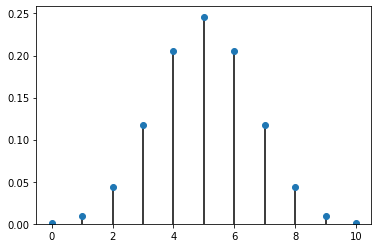

In [7]:
plot_discrete_distribution( b2 )

---

## Continuous Random Variables

(For discrete random variables, [see further above](#discrete-random-variables).

Continuous random variables take on an infinite number of different values, sometimes in a certain range (like the uniform distribution on $[0,1]$, for example) and sometimes over the whole real number line (like the normal distribution, for example).

### Creating them

In [8]:
# for uniform on the interval [a,b]: use loc=a, scale=b-a
u = stats.uniform( loc=10, scale=2 )
# for normal use loc=mean, scale=standard deviation
n = stats.norm( loc=100, scale=5 )
# for t, same as normal, plus df=degrees of freedom
t = stats.t( df=15, loc=100, scale=5 )

### Computing probabilities from a Continuous Random Variable

For a continuous random variable, you cannot compute the probability that it will equal a precise number, because such a probability is always zero.  But you can compute the probability that the value falls within a certain interval on the number line.

To do so for an interval $[a,b]$, compute the total probability accumulated up to $a$ and subtract it from that up to $b$, as follows.

In [9]:
a, b = 95, 100  # or any values
n.cdf( b ) - n.cdf( a )  # probability of being in that interval

0.3413447460685429

The same code works for any continuous random variable, not just `n`.

### Generating values from a Continuous Random Variable

In [10]:
n.rvs( 10 )  # same as for discrete random variables

array([110.09661673,  91.90862876,  99.33812616, 102.48703626,
        89.82820936, 102.72826899, 108.06635799, 102.7833809 ,
        90.76909569,  93.56668969])

### Plotting the Distribution of a Continuous Random Variable

Here's a function you can use to plot the center 99.98% of any continuous probability distribution.

In [11]:
def plot_continuous_distribution ( rv ):
    xmin, xmax = rv.ppf( 0.0001 ), rv.ppf( 0.9999 )
    x = np.linspace( xmin, xmax, 100 )
    y = rv.pdf( x )
    plt.plot( x, y )

Example use:

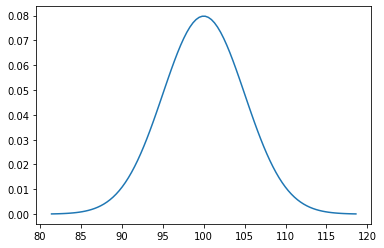

In [12]:
plot_continuous_distribution( n )

---

## Confidence Intervals

Recall from GB213 that certain assumptions about normality must hold in order for you to do statistical inference.  We do not cover those here; refer to your GB213 text or notes.

Here we cover a confidence interval for the sample mean using confidence level $\alpha$, which must be between 0 and 1 (typically 0.95).

In [13]:
α = 0.95
# normally you'de have data; for this example, I make some up:
data = [ 435,542,435,4,54,43,5,43,543,5,432,43,36,7,876,65,5 ]
est_mean = np.mean( data )  # estimate for the population mean
sem = stats.sem( data )     # standard error for the sample mean
# margin of error:
moe = sem * stats.t.ppf( ( 1 + α ) / 2, len( data ) - 1 )
( est_mean - moe, est_mean + moe )  # confidence interval

(70.29847811072423, 350.0544630657464)

---

## Hypothesis Testing

Again, in GB213 you learned what assumptions must hold in order to do a hypothesis test, which I do not review here.

Let $H_0$ be the null hypothesis, the currently held belief.  Let $H_a$ be the alternative, which would result in some change in our beliefs or actions.

We assume some chosen value $0\leq\alpha\leq1$, which is the probability of a Type I error (false positive, finding we should reject $H_0$ when it's actually true).

### Two-sided test for $H_0:\mu=\bar{x}$

Say we have a population whose mean $\mu$ is known to be 10.  We take a sample $x_1,\ldots,x_n$ and compute its mean, $\bar{x}$.  We then ask whether this sample is significantly different from the population at large, that is, is $\mu=\bar{x}$?  We can do a two-sided test of $H_0:\mu=\bar{x}$ as follows.

In [14]:
α = 0.05
μ = 10
sample = [ 9, 12, 14, 8, 13 ]
t_statistic, p_value = stats.ttest_1samp( sample, μ )
reject_H0 = p_value < α
α, p_value, reject_H0

(0.05, 0.35845634462296455, False)

The output above says that the data does NOT give us enough information to reject the null hypothesis.  So we should continue to assume that the sample is like the population, and $\mu=\bar{x}$.

### Two-sided test for $H_0: \bar{x}_1=\bar{x}_2$

What if we had wanted to do a test for whether two independent samples had the same mean?  We can ask that question as follows.  (Here we assume they have equal variances, but you can turn that assumption off with a third parameter to `ttest_ind`.)

In [15]:
α = 0.05
sample1 = [ 6, 9, 7, 10, 10, 9 ]
sample2 = [ 12, 14, 10, 17, 9 ]
t_statistics, p_value = stats.ttest_ind( sample1, sample2 )
reject_H0 = p_value < α
α, p_value, reject_H0

(0.05, 0.02815503832602318, True)

The output above says that the two samples DO give us enough information to reject the null hypothesis.  So the data suggest that the two samples have different means.

---

## Linear Regression

### Creating a linear model of data

Normally you would have data that you wanted to model.  But in this example notebook, I have to make up some data first.

In [16]:
df = pd.DataFrame( {
    "height" : [ 393, 453, 553, 679, 729, 748, 817 ],  # completely made up
    "width"  : [  24,  25,  27,  36,  55,  68,  84 ]   # also totally pretend
} )

As with all the content of this document, the assumptions required to make the technique applicable are not covered in detail, but in this case we at least review them briefly.  To ensure that linear regression is applicable, one should verify:

 1. We have two columns of numerical data of the same length.
 1. We have made a scatter plot and observed a seeming linear relationship.
 1. We know that there is no autocorrelation.
 1. We will check later that the residuals are normally distributed.
 1. We will check later that the residuals are homoscedastic.

To create a linear model, use `scipy` as follows.

In [17]:
model = stats.linregress( df.height, df.width )
model

LinregressResult(slope=0.1327195637885226, intercept=-37.32141898334582, rvalue=0.8949574425541466, pvalue=0.006486043236692156, stderr=0.029588975845594334)

A linear model is usually written like so:

$$ y = \beta_0 + \beta_1 x $$

The slope is $\beta_1$ and the intercept is $\beta_0$.

In [18]:
β0 = model.intercept
β1 = model.slope
β0, β1

(-37.32141898334582, 0.1327195637885226)

From the output above, our model would therefore be the following (with some rounding for simplicity):

$$ y = -37.32 + 0.132x $$

To know how good it is, we often ask about the $R^2$ value.

In [19]:
R = model.rvalue
R, R**2

(0.8949574425541466, 0.8009488239830586)

In this case, $R^2$ would be approximately $0.895^2$, or about $0.801$.  Thus our model explains about 80.1% of the variability in the data.

### Visualizing the model

The Seaborn visualization package provides a handy tool for making scatterplots with linear models overlaid.  The light blue shading is a confidence band we will not cover.

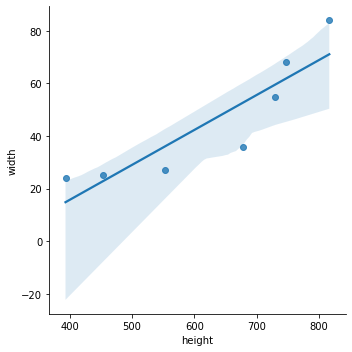

In [20]:
sns.lmplot( x='height', y='width', data=df )
plt.show()

---

## Other Topics

### ANOVA

Analysis of variance is an optional topic your GB213 class may or may not have covered, depending on scheduling and instructor choices.  If you covered it in GB213 and would like to see how to do it in Python, check out [the Scipy documentation for `f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

### $\chi^2$ Tests

Chi-squared ($\chi^2$) tests are another optional GB213 topic that your class may or may not have covered.  If you are familiar with it and would like to see how to do it in Python, check out [the Scipy documentation for `chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html).